In [132]:
import importlib
import regretNet_GPU
importlib.reload(regretNet_GPU)
from regretNet_GPU import *
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
#importlib.reload(losses)
#importlib.reload(utils)
import numpy as np
import distributions
importlib.reload(distributions)

<module 'distributions' from '/Users/julesbaudet/Desktop/AUCTION THEORY/code_corrected/distributions.py'>

###################################################################################


EPOCH NUMBER:  1


###################################################################################
time misreports:  0.09056591987609863
time train model:  0.007046937942504883
training weights: 0.017523765563964844
time train model:  0.006168842315673828
1 epoch took 107.02728414535522 sec, step 1249


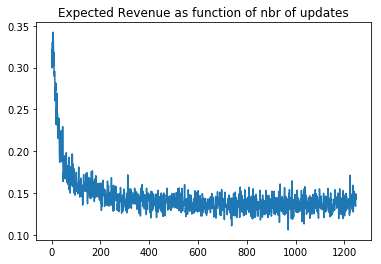

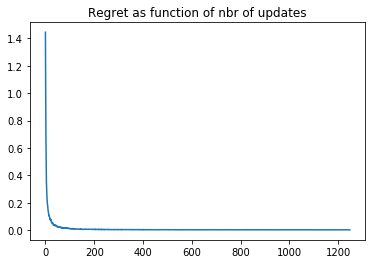

epoch revenue:  0.14533871412277222
training weights: 0.015404224395751953
time misreports:  0.08174490928649902
time train model:  0.00887608528137207
###################################################################################


EPOCH NUMBER:  2


###################################################################################
time misreports:  0.12444281578063965
time train model:  0.01187586784362793
training weights: 0.024318933486938477
time train model:  0.00660395622253418
1 epoch took 113.45576286315918 sec, step 1249


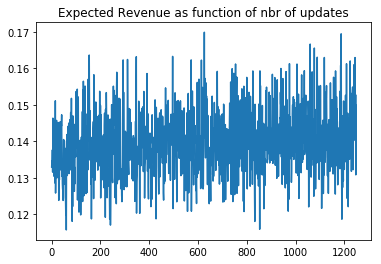

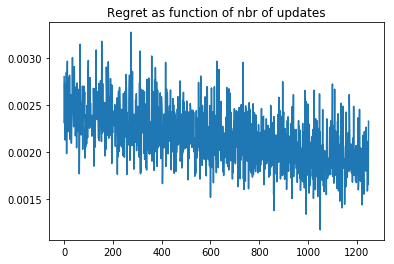

epoch revenue:  0.13985028862953186
training weights: 0.016391754150390625
time misreports:  0.07554221153259277
time train model:  0.006743907928466797
###################################################################################


EPOCH NUMBER:  3


###################################################################################
time misreports:  0.07786107063293457
time train model:  0.007388114929199219
training weights: 0.01783895492553711
time train model:  0.007979869842529297
1 epoch took 120.08388781547546 sec, step 1249


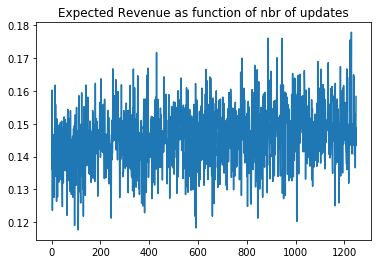

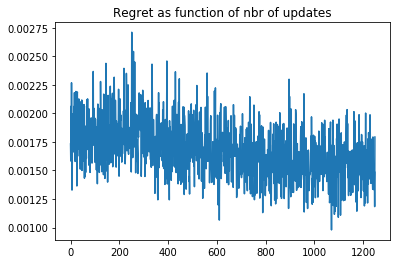

epoch revenue:  0.14583736658096313
training weights: 0.01512908935546875
time misreports:  0.07083892822265625
time train model:  0.007190704345703125
###################################################################################


EPOCH NUMBER:  4


###################################################################################
time misreports:  0.06876802444458008
time train model:  0.00925898551940918
training weights: 0.016638994216918945
time train model:  0.0069539546966552734
1 epoch took 118.74085903167725 sec, step 1249


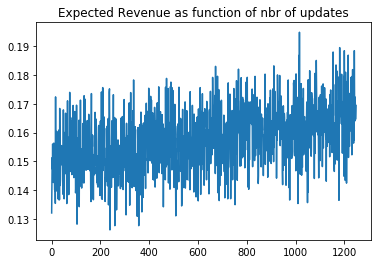

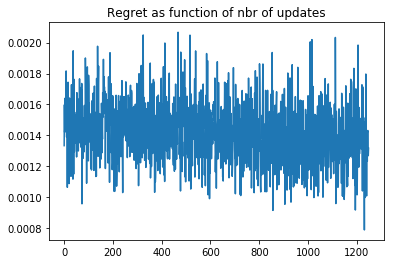

epoch revenue:  0.15754243731498718
training weights: 0.016381025314331055
time misreports:  0.08463287353515625
time train model:  0.007398843765258789
###################################################################################


EPOCH NUMBER:  5


###################################################################################
time misreports:  0.06537175178527832
time train model:  0.006417036056518555
training weights: 0.01568913459777832
time train model:  0.006558895111083984
1 epoch took 100.3664870262146 sec, step 1249


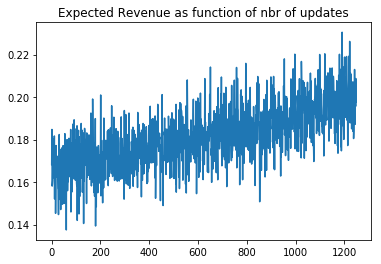

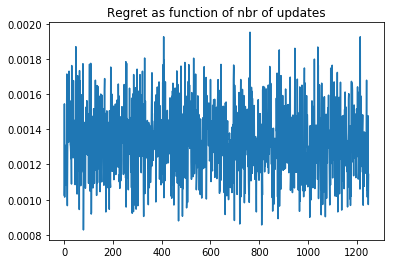

epoch revenue:  0.18132509291172028
training weights: 0.014246940612792969
time misreports:  0.06506013870239258
time train model:  0.006433010101318359
###################################################################################


EPOCH NUMBER:  6


###################################################################################
time misreports:  0.06542205810546875
time train model:  0.007004976272583008
training weights: 0.016448020935058594
time train model:  0.0069408416748046875
1 epoch took 97.91914987564087 sec, step 1249


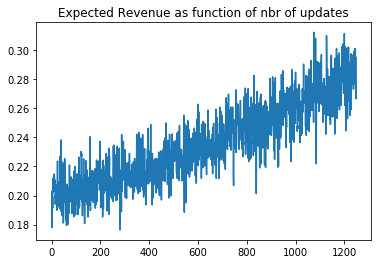

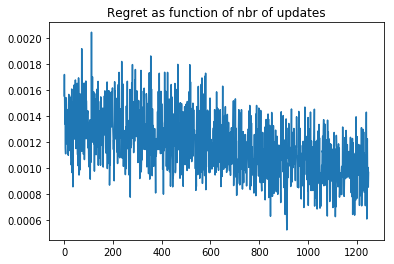

epoch revenue:  0.23586329817771912
training weights: 0.014887094497680664
time misreports:  0.06924724578857422
time train model:  0.006087064743041992
###################################################################################


EPOCH NUMBER:  7


###################################################################################
time misreports:  0.06166505813598633
time train model:  0.006540060043334961
training weights: 0.015022039413452148
time train model:  0.005835771560668945
1 epoch took 112.30032587051392 sec, step 1249


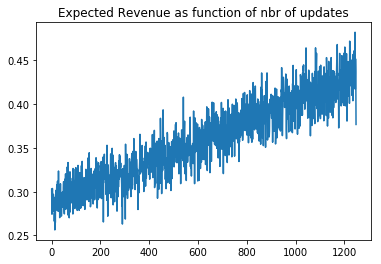

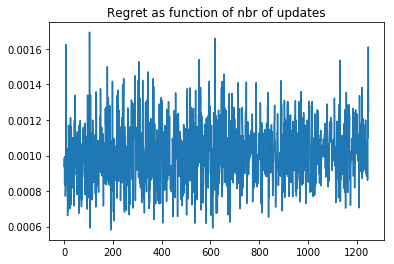

epoch revenue:  0.35952699184417725
training weights: 0.015637874603271484
time misreports:  0.08037900924682617
time train model:  0.007382631301879883
###################################################################################


EPOCH NUMBER:  8


###################################################################################
time misreports:  0.07461309432983398
time train model:  0.010687112808227539
training weights: 0.019893884658813477
time train model:  0.007821798324584961
1 epoch took 121.23122000694275 sec, step 1249


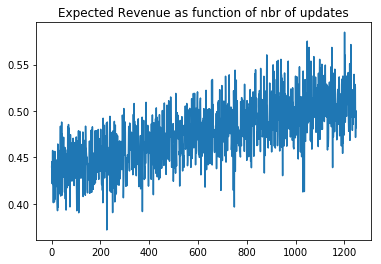

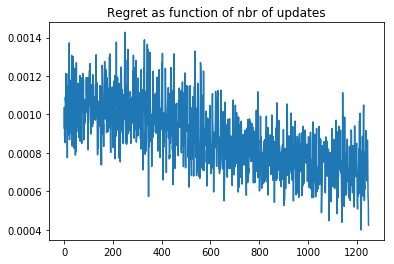

epoch revenue:  0.47517505288124084
training weights: 0.017678022384643555
time misreports:  0.07727193832397461
time train model:  0.007508993148803711
###################################################################################


EPOCH NUMBER:  9


###################################################################################
time misreports:  0.08690094947814941
time train model:  0.007807016372680664
training weights: 0.0179440975189209
time train model:  0.010783910751342773
1 epoch took 117.74781489372253 sec, step 1249


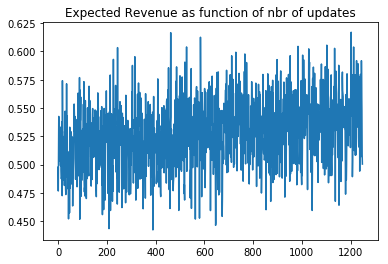

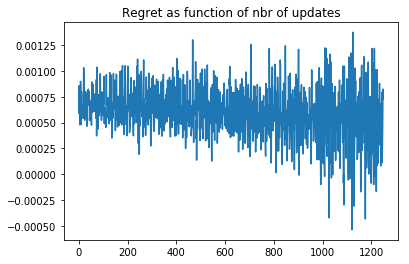

epoch revenue:  0.5276792645454407
training weights: 0.015472888946533203
time misreports:  0.07516193389892578
time train model:  0.006771087646484375
###################################################################################


EPOCH NUMBER:  10


###################################################################################
time misreports:  0.07134699821472168
time train model:  0.006794929504394531
training weights: 0.017843246459960938


In [ ]:
mode = 'additive'
n_epochs = 10
n_bidders = 1
n_objects = 2
distrib_list = [distributions.UniformDistrib(0,1), distributions.UniformDistrib(0,1)]
env = Auction_Environment(n_bidders, n_objects, distrib_list)
net = Add_Network(env, mode)
#print(net.alloc_net)
#print(net.pay_net)

trainer = Trainer(env, net, n_epochs)
for q in range(n_epochs):
    print('###################################################################################')
    print('\n')
    print('EPOCH NUMBER: ', q+1)
    print('\n')
    print('###################################################################################')
    trainer.train()
    torch.save(trainer.net, './model_one_bidder_two_objects')

In [ ]:
for q in range(40):
    print('###################################################################################')
    print('\n')
    print('EPOCH NUMBER: ', q+1)
    print('\n')
    print('###################################################################################')
    trainer.train()
    torch.save(trainer.net, './model_one_bidder_two_objects')

In [105]:
net = trainer.net

st = 0
ed = 1
size = 100

X = np.linspace(st, ed, size)
Y = np.linspace(st, ed, size)

values = np.zeros((size, size))
values_bis = np.zeros((size, size))

for i in range (len(X)):
    for j in range (len(Y)):
        values_bis[i][j] = net.alloc_net.forward(torch.Tensor([X[i],Y[j]]))[1]
        values[i][j] = net.alloc_net.forward(torch.Tensor([X[i],Y[j]]))[0]


fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (13,13))
img = ax.imshow(values[::-1, :], extent=[0,1,0,1], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd')
plt.title('proba of alloc of object 1', size = 19)
plt.xlabel('v1', size = 15)
plt.ylabel('v2', size = 15)
plt.pcolor(X, Y, values, cmap = 'YlOrRd')
plt.colorbar(img, fraction=0.046, pad=0.04)
plt.savefig('proba_alloc_object1.pdf')
plt.show()


fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (13,13))
img = ax.imshow(values_bis[::-1, :], extent=[0,1,0,1], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd')
plt.title('proba of alloc of object 2', size = 19)
plt.xlabel('v1', size = 15)
plt.ylabel('v2', size = 15)
plt.pcolor(X, Y, values_bis, cmap = 'YlOrRd')
plt.colorbar(img, fraction=0.046, pad=0.04)
plt.savefig('proba_alloc_object2.pdf')
plt.show()

IndexError: index 1 is out of bounds for dimension 0 with size 1

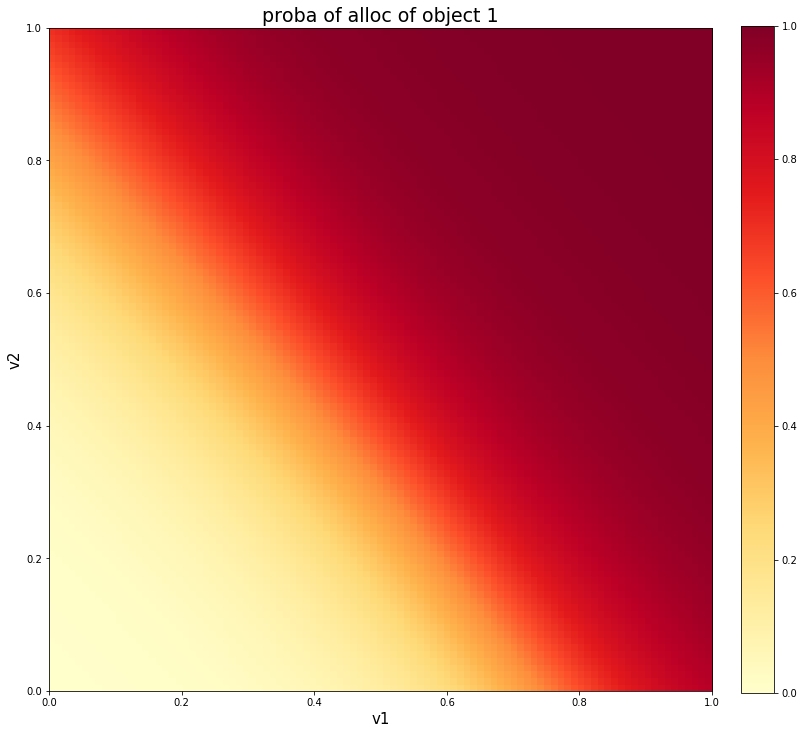

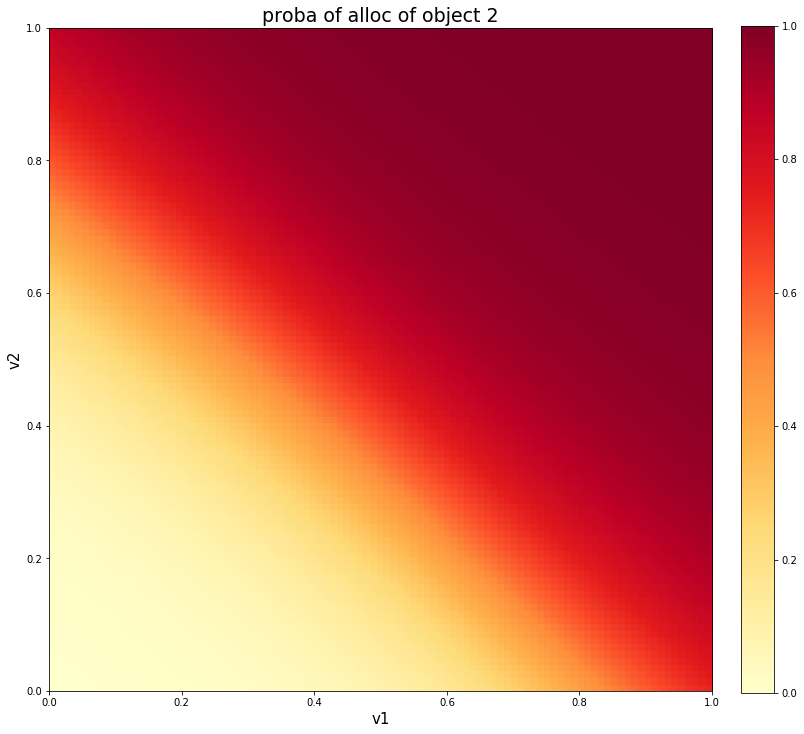

In [115]:
net = trainer.net

st_x, st_y = 0, 0
ed_x, ed_y = 1, 1
size = 100

X = np.linspace(st_x, ed_x, size)
Y = np.linspace(st_y, ed_y, size)

values = np.zeros((size, size))
values_bis = np.zeros((size, size))

for i in range (len(X)):
    for j in range (len(Y)):
        values_bis[i][j] = net.alloc_net.forward(torch.Tensor([[X[i],Y[j]]]))[0][0] #add some brackets if unit-demand
        values[i][j] = net.alloc_net.forward(torch.Tensor([[X[i],Y[j]]]))[0][1]

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (13,13))
img = ax.imshow(values[::-1, :], extent=[st_x,ed_x,st_y,ed_y], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd')
plt.title('proba of alloc of object 1', size = 19)
plt.xlabel('v1', size = 15)
plt.ylabel('v2', size = 15)
plt.pcolor(X, Y, values, cmap = 'YlOrRd')
plt.colorbar(img, fraction=0.046, pad=0.04)
plt.savefig('proba_alloc_object1.pdf')
plt.show()


fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (13,13))
img = ax.imshow(values_bis[::-1, :], extent=[st_x,ed_x,st_y,ed_y], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd')
plt.title('proba of alloc of object 2', size = 19)
plt.xlabel('v1', size = 15)
plt.ylabel('v2', size = 15)
plt.pcolor(X, Y, values_bis, cmap = 'YlOrRd')
plt.colorbar(img, fraction=0.046, pad=0.04)
plt.savefig('proba_alloc_object2.pdf')
plt.show()

In [21]:
a = torch.Tensor([[[102,112, 1, 4], 
                   [10, 13811, 3, 113]],
                 [[102,112, 1, 4], 
                   [10, 13811, 3, 113]]])

b = torch.Tensor([[12,113, 1931, 5], [24, 5, 3, -324]])

print(a)
print(b)

torch.min(a,b)

tensor([[[1.0200e+02, 1.1200e+02, 1.0000e+00, 4.0000e+00],
         [1.0000e+01, 1.3811e+04, 3.0000e+00, 1.1300e+02]],

        [[1.0200e+02, 1.1200e+02, 1.0000e+00, 4.0000e+00],
         [1.0000e+01, 1.3811e+04, 3.0000e+00, 1.1300e+02]]])
tensor([[  12.,  113., 1931.,    5.],
        [  24.,    5.,    3., -324.]])


tensor([[[  12.,  112.,    1.,    4.],
         [  10.,    5.,    3., -324.]],

        [[  12.,  112.,    1.,    4.],
         [  10.,    5.,    3., -324.]]])

In [85]:
a = torch.Tensor([-0.2845, -0.3463, -0.1384,  0.0614, -0.1185, -0.1325,  0.1275,  0.0821])
a[: n_objects * (n_bidders+1)]

tensor([-0.2845, -0.3463, -0.1384,  0.0614])

In [23]:
F.softmax(a, dim = 1)

tensor([[[1.0000e+00, 0.0000e+00, 1.1920e-01, 0.0000e+00],
         [1.1089e-40, 1.0000e+00, 8.8080e-01, 1.0000e+00]],

        [[1.0000e+00, 0.0000e+00, 1.1920e-01, 0.0000e+00],
         [1.1089e-40, 1.0000e+00, 8.8080e-01, 1.0000e+00]]])